# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [7]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [8]:
data.shape
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [9]:
data.isna().values.any() #for checking NaN values

np.False_

In [10]:
data.duplicated().values.any()
dupl_rows= data[data.duplicated()]
print(f"Num of duplicates: {len(dupl_rows)}")

Num of duplicates: 0


In [11]:
data.info() #an accumulated view of previous steps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
charts_to_remove=[ "," , "$"]
columns_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_convert:
    for char in charts_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "") #.astype(str) for converting to string , .str.replace() for replacing the first value char to "" which indicates no value
    data[col] = pd.to_numeric(data[col]) #Convert column to a numeric data again
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date) #notice that full name of the Release_Date column is used!
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
data.USD_Production_Budget.mean()

np.float64(31113737.57837136)

In [15]:
#statistics of all columns:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [16]:
data[data.USD_Production_Budget == 1100.00] #calling the film with the lowest budget

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [17]:
data[data.USD_Production_Budget == 425000000.00] #number should be written without commas

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f"Number of films that grossed $0 domestically: {len(zero_domestic)}")
zero_domestic.sort_values("USD_Production_Budget", ascending=False)

Number of films that grossed $0 domestically: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [19]:
zero_worldwide= data[data.USD_Worldwide_Gross == 0]
print(f"Number of films that grossed $0 worldwide: {len(zero_worldwide)}")
zero_worldwide.sort_values("USD_Worldwide_Gross", ascending=False)

Number of films that grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
140,3559,1968-10-10,Barbarella,9000000,0,0
78,5152,1957-04-13,12 Angry Men,340000,0,0
75,4455,1956-12-01,Diane,2660000,0,0
66,4705,1955-12-31,The King’s Thief,1577000,0,0


### Filtering on Multiple Conditions

In [20]:
international_releases= data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)] #2 conditions inside loc[] turn bool_lists and loc takes the values whicih corresponds True values in both of those lists
print(f"Num of int releases: {len(international_releases)}")
international_releases.head()

Num of int releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [21]:
int_releases= data.query("USD_Domestic_Gross == 0" and "USD_Worldwide_Gross != 0")
print(f"Num of int releases: {len(int_releases)}")
int_releases.tail()

Num of int releases: 5034


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [22]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [23]:
not_yet_released = data[data.Release_Date >= scrape_date]
print(f"Num of films not yet released: {len(not_yet_released)}")
not_yet_released

Num of films not yet released: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [24]:
data_clean = data.drop(not_yet_released.index) #from now on we will work with data_clean DF

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [25]:
money_losing_films = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing_films)/len(data_clean)

0.37277117384843983

In [26]:
money_losing_films = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross") #with .query() function using strings
len(money_losing_films)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

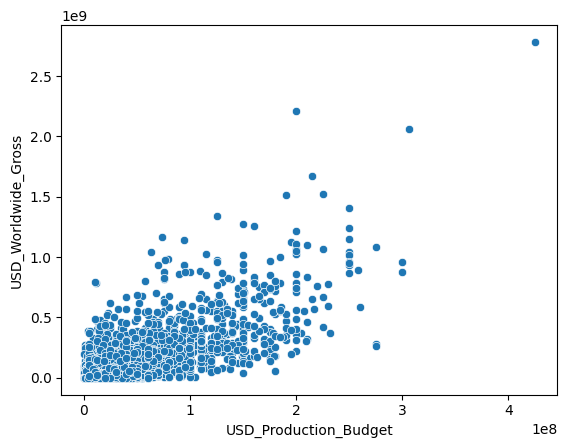

In [28]:
sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross")

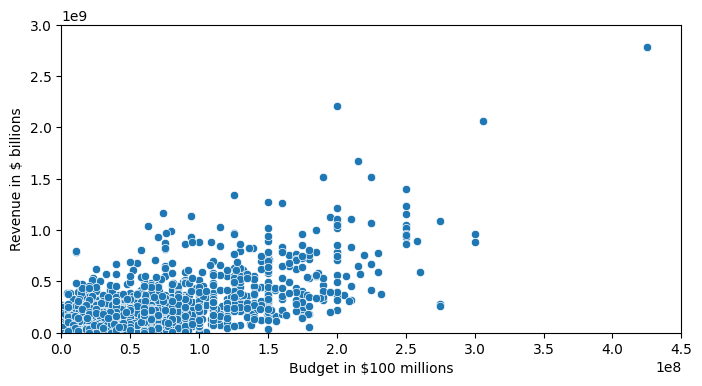

In [29]:
#we can dive into the Matplotlib layer anytime to configgure our chart.
plt.figure(figsize=(8,4), dpi=100)
ax= sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross")
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

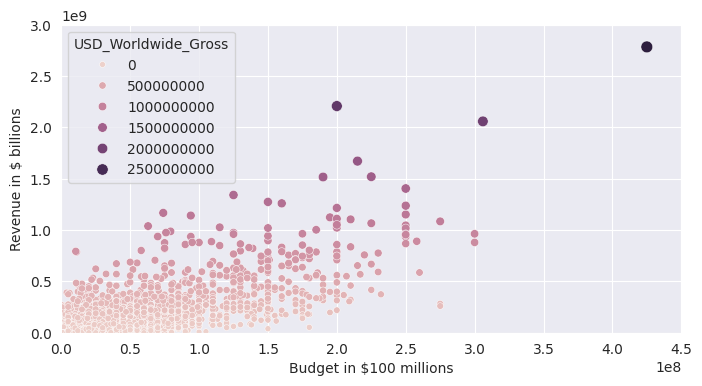

In [30]:
#from scatterplot to bubble chart

with sns.axes_style('darkgrid'): #set stylilng on a single chart: darkgrid, whitegrid, dark, ticks...
  plt.figure(figsize=(8,4), dpi=100)
  ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # colour
                        size='USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions',)

  plt.show()

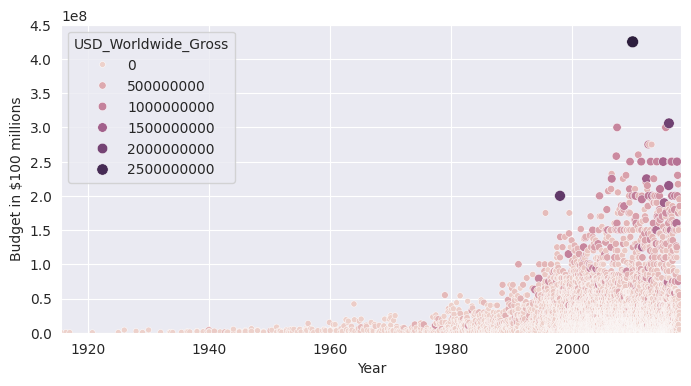

In [31]:
plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [32]:
dt_index= pd.DatetimeIndex(data_clean.Release_Date)
years=dt_index.year
decades= years // 10 * 10
data_clean["Decade"] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [33]:
old_films= data_clean[data_clean.Decade < 1970]
new_films= data_clean[data_clean.Decade >= 1970]
old_films.Movie_Title.count()

np.int64(153)

In [34]:
old_films.sort_values("USD_Production_Budget", ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

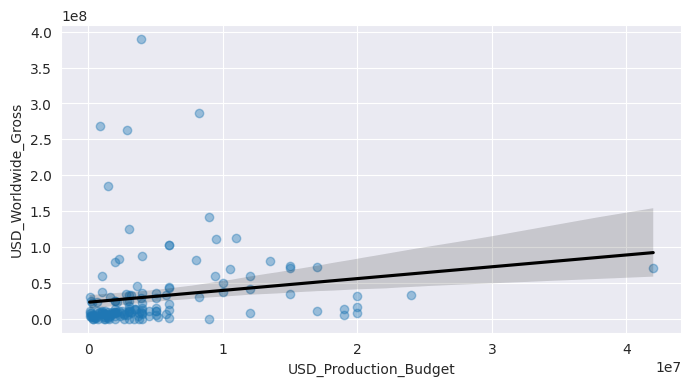

In [35]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("darkgrid"):
  sns.regplot(data=old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross",
              scatter_kws={'alpha': 0.4}, line_kws={'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

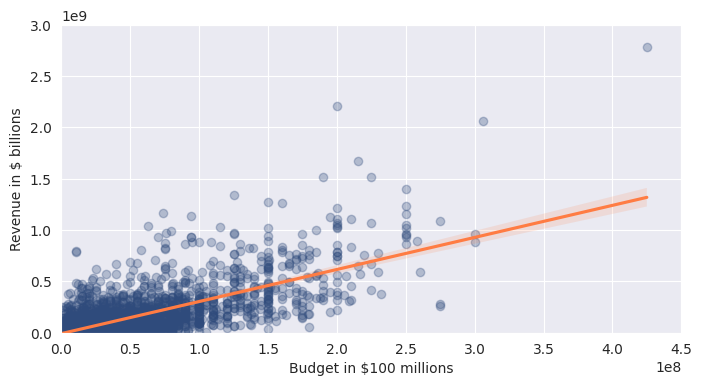

In [40]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=new_films, x="USD_Production_Budget", y="USD_Worldwide_Gross",
              color= "#2f4b7c", scatter_kws={'alpha': 0.3}, line_kws={'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
#We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET)
#The slope tells us how much extra revenue we get for a $1 increase in the movie budget.
#generally the features named capital X and the target named lower case y

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X= pd.DataFrame(new_films, columns=["USD_Production_Budget"])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
#LinearRegression does not like receiving Pandas Series, so we have created some new DataFrames there

# Find the best-fit line
regression.fit(X, y)


In [45]:
#Theta zero
regression.intercept_

#result means that if a movie budget is $0, the estimated movie revenue is -$8.65 which is clearly unrealistic

array([-8650768.00661027])

In [48]:
#Theta one
regression.coef_

#slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1 meaning the higher the budget, the higher the estimated value

array([[3.12259592]])

In [49]:
#One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.
regression.score(X,y)

#result means that our model explains about 56% of the variance in movie revenue even though it is a simple model with one explanatory variable

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [50]:
X= pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f"intercept: {regression.intercept_}")
print(f"slope: {regression.coef_}")
print(f"r-squared: {regression.score(X,y)}")

intercept: [22821538.63508039]
slope: [[1.64771314]]
r-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [57]:
budget= 350000000
revenue_estimate= regression.intercept_[0] + regression.coef_[0,0] * budget
estimated_revenue= round(revenue_estimate, -6)
print(f"The estimated revenue for ${budget / 1000000} film is around ${estimated_revenue / 1000000}")

The estimated revenue for $350.0 film is around $600.0
